# MODELIZACIÓN REGRESION EXPOSURE AT DEFAULT

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'C:/Usuarios/Alfredo/DS4B/Python DS Mastery/EstructuraDirectorio/03_MACHINE_LEARNING/07_CASOS/03_RIESGOS'

Nombres de los ficheros de datos.

In [3]:
nombre = 'df_tablon_ead.pickle'

Cargar los datos.

In [4]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre)

## CREAR X e Y

In [5]:
x = df.drop(columns='target_ead')
y = df.target_ead

## MODELIZAR

### Reservar el dataset de validacion

In [6]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

In [7]:
pipe = Pipeline([('algoritmo',Ridge())])

grid = [      
        {'algoritmo': [Ridge()],
         'algoritmo__alpha': list(np.arange(0.1,1.1,0.1))},
        
        {'algoritmo': [Lasso()],
         'algoritmo__alpha': list(np.arange(0.1,1.1,0.1))},
    
        {'algoritmo': [HistGradientBoostingRegressor(min_samples_leaf = 100, scoring = 'neg_mean_absolute_percentage_error')],
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_iter': [50,100,200],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__l2_regularization': [0,0.25,0.5,0.75,1]}
       ]

### Optimizar los hiper parámetros

####  Con grid search

In [9]:
grid_search = GridSearchCV(estimator= pipe, 
                           param_grid = grid, 
                           cv = 3, 
                           scoring = 'neg_mean_absolute_error',
                           verbose = 0,
                           n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)

In [10]:
salida = pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score').reset_index(drop=True).head(10)
salida

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__alpha,param_algoritmo__l2_regularization,param_algoritmo__learning_rate,param_algoritmo__max_depth,param_algoritmo__max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,55.09,0.47,1.07,0.01,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.25,0.10,10,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.23,-0.24,-0.24,-0.24,0.00,1
1,63.19,12.13,1.08,0.03,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.75,0.10,10,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.23,-0.24,-0.24,-0.24,0.00,2
2,95.14,13.10,1.37,0.12,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.50,0.10,20,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.24,-0.24,-0.23,-0.24,0.00,3
3,56.26,1.02,1.09,0.03,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.75,0.10,20,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.24,-0.24,-0.24,-0.24,0.00,4
4,66.65,1.45,1.25,0.07,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.50,0.10,10,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.24,-0.24,-0.24,-0.24,0.00,5
5,54.32,0.10,1.12,0.03,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0,0.10,10,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.24,-0.24,-0.23,-0.24,0.00,6
6,66.05,13.09,1.10,0.03,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0,0.10,20,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.24,-0.24,-0.24,-0.24,0.00,7
7,62.69,12.12,1.06,0.01,HistGradientBoostingRegressor(l2_regularizatio...,NaN,1,0.10,10,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.24,-0.24,-0.24,-0.24,0.00,8
8,53.83,1.13,0.86,0.07,HistGradientBoostingRegressor(l2_regularizatio...,NaN,1,0.10,20,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.24,-0.24,-0.24,-0.24,0.00,9
9,66.94,11.31,1.09,0.04,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.25,0.10,20,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.24,-0.24,-0.24,-0.24,0.00,10


Mejor modelo:

In [13]:
salida.params[0]

{'algoritmo': HistGradientBoostingRegressor(l2_regularization=0.25, max_depth=10,
                               max_iter=200, min_samples_leaf=100,
                               scoring='neg_mean_absolute_percentage_error'),
 'algoritmo__l2_regularization': 0.25,
 'algoritmo__learning_rate': 0.1,
 'algoritmo__max_depth': 10,
 'algoritmo__max_iter': 200}

Vemos que el resultado es el mismo en todas las primeras configuraciones.

Si bien es un error bastante alto (mean_test_score) del 24%, se considera que es aceptable dado que en este 
caso tiene que calcular el EAD tanto para los casos donde luego se ve que hay default (donde aplica el EAD)
como para los que no tendrán default.

También se ve que el CV es estable, ya que los valores split0_test_score, split1_test_score, y
split2_test_score son similares.

Por sencillez nos quedamos con el primero.

Y reentreamos el modelo con esa configuración.

In [14]:
modelo_ead = HistGradientBoostingRegressor(learning_rate = 0.1,
                                          max_iter = 200,
                                          max_depth = 10,
                                          min_samples_leaf = 100,
                                          scoring = 'neg_mean_absolute_percentage_error',
                                          l2_regularization = 0.25)
modelo_ead.fit(train_x,train_y)

HistGradientBoostingRegressor(l2_regularization=0.25, max_depth=10,
                              max_iter=200, min_samples_leaf=100,
                              scoring='neg_mean_absolute_percentage_error')

## EVALUAR

### Predecir sobre validación

In [15]:
pred = modelo_ead.predict(val_x)

Corregimos los máximos y mínimos. Donde el EAD da menor que cero se asigna un 0 (0%) y cuando da mayor que 1
se asigna un 1 (100%)

In [16]:
pred = np.where(pred < 0, 0, pred)
pred = np.where(pred > 1, 1, pred)

### Evaluar sobre validación

In [17]:
mean_absolute_error(val_y, pred)

0.23502925700125826

## REPORTING DEL MODELO

In [18]:
check_validacion = pd.DataFrame({'ead_real':val_y, 'ead_pred':pred})
check_validacion

,ead_real,ead_pred
id_cliente,,
110271427,0.45,0.33
123602950,0.61,0.43
135710424,0.79,0.21
96568584,0.64,0.44
78359653,0.00,0.41
...,...,...
141081218,0.94,0.89
70895913,0.00,0.13
11397252,0.00,0.31


Se nota que el el error es mucho menor en los casos donde hay default (ead_real > 0)

In [19]:
check_validacion.corr()

,ead_real,ead_pred
ead_real,1.00,0.63
ead_pred,0.63,1.00


La correlacion de la predicción respecto a la real es de 63%, bastante buena

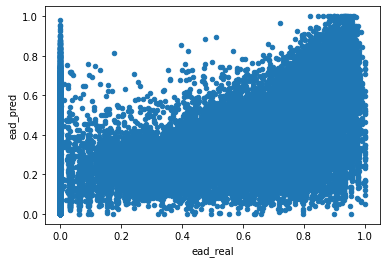

In [20]:
check_validacion.plot.scatter(x='ead_real',y='ead_pred');

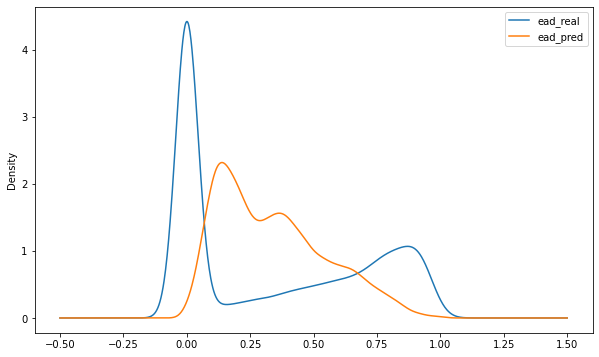

In [21]:
check_validacion.plot.density(figsize = (10,6));

En la distribución real se ven dos grandes grupos, los que no tienen default (ead = 0), y los que tienen un ead entre 
75% y 100%. La distribución de la predicción se queda en el medio dado que como se indicó anteriormente no se sabe a priori
si el cliente para el que se predice el EAD cayó realmente en default o no, por lo que la predicción "agregada" está bastante bien para lo que es un modelo de adquisición.